In [1]:
import sys
import os

modules_route = str(os.getcwd()).replace("\\", "/")+"/Modules/"
sys.path.insert(0, modules_route)

import waver as wv
import WavePlotter as wp
import WaveUmaper as wu

In [4]:
#Create a class Wavs, will ask for a dataframe in txt forman with 'space' separation
wavs = wv.Wavs()
wavs.metadata

,filename,start,end,label,station,labeller
0,1654237560_1654237620.wav,0.338028,4.225351,dog,capta_002,Cristian_C
1,1654237560_1654237620.wav,5.915491,12.591545,dog,capta_002,Cristian_C
2,1654237560_1654237620.wav,15.211262,18.422528,dog,capta_002,Cristian_C
3,1654237560_1654237620.wav,19.436612,28.478862,dog,capta_002,Cristian_C
4,1654237560_1654237620.wav,31.605622,39.971816,dog,capta_002,Cristian_C
...,...,...,...,...,...,...
24386,62f8c4dcff16b865defa12e7.wav,37.364771,39.528433,shouting,capta_002,Esteban_V
24387,62f8c4dcff16b865defa12e7.wav,45.104022,47.434119,talk,capta_002,Esteban_V
24388,62f8c4dcff16b865defa12e7.wav,54.018719,59.934078,car_moving,capta_002,Esteban_V
24389,62f8c4dcff16b865defa12e7.wav,0.000000,7.209613,car_moving,capta_002,Esteban_V


In [5]:
#This function will track all audios and add usefull values, as argument need a threshold (duration in seconds)
#First, will ask for audios directory (any directory that you want to be classified)
#      DIRECTORY FOLDERS NAME WILL BE ALSO DE LABEL OF THE AUDIO PACK!!!!
#      You will get a dataframe with cols:
#        -> ['filename', 'original wav', 'label', 'station', 'duration', 'power']
#
#Second, program will ask when finished the classification a folder to export the dataframe
#        -> name will be folders name + .txt,   example noise.txt
wavs.classifier(0.5)

bird folder is being classified
1180 / 3177
Ignored audios [threshold = 0.500000 sec]: 95
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "Z:\Anaconda\envs\fusa-training\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\jrmor\AppData\Local\Temp\ipykernel_684\1633110514.py", line 9, in <module>
    wavs.classifier(0.5)
  File "Z:\Proyectos/fusa-training/Modules\waver.py", line 92, in classifier
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "Z:\Anaconda\envs\fusa-training\lib\site-packages\IPython\core\interactiveshell.py", line 2052, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "Z:\Anaconda\envs\fusa-training\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "Z:\Anaconda\envs\fusa-training\lib\site-packages\IPython\core\ultratb.py", line 1012, in structured_traceback
    return VerboseTB.struct

In [2]:
#Select dataframe generated in wavs.classifier(treshold) (like bells.txt or noise.txt)
wave_plot = wp.WavePlot()

Selection: Z:/Proyectos/fusa-training/Data/Threshold_05/bells.txt


Working at: Z:/Proyectos/fusa-training/Audios/bells
62df69837a2acbde063ebd61_bells_8672.wav
9 / 9


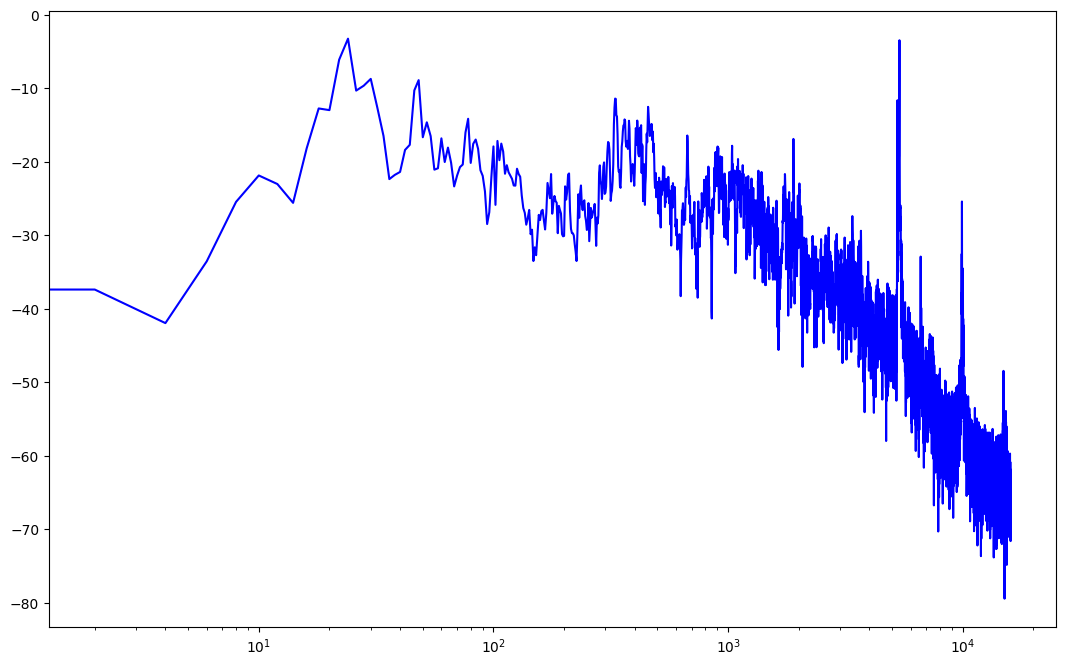

In [3]:
ax = wave_plot.Mean_Power_Spectral_Density()

In [2]:
#ask for selection of dataframe (generated from wavs.classifier) 
umaper = wu.Umaper()

In [3]:
#Ask for an origin folder (wavs)
#Then ask for a destiny folder (npz)

umaper.NPZ_generator()

Working in air_conditioner folder
3 / 3
Exporting EM2030-00750-2022-05-31T10-15-15-062dB_air_conditioner_25692.npz in Z:/Proyectos/fusa-training/NPZ/air_conditioner
